"""
1035. Uncrossed Lines
Solved
Medium
Topics
Companies
Hint
You are given two integer arrays nums1 and nums2. We write the integers of nums1 and nums2 (in the order they are given) on two separate horizontal lines.

We may draw connecting lines: a straight line connecting two numbers nums1[i] and nums2[j] such that:

nums1[i] == nums2[j], and
the line we draw does not intersect any other connecting (non-horizontal) line.
Note that a connecting line cannot intersect even at the endpoints (i.e., each number can only belong to one connecting line).

Return the maximum number of connecting lines we can draw in this way.


Example 1:


Input: nums1 = [1,4,2], nums2 = [1,2,4]
Output: 2
Explanation: We can draw 2 uncrossed lines as in the diagram.
We cannot draw 3 uncrossed lines, because the line from nums1[1] = 4 to nums2[2] = 4 will intersect the line from nums1[2]=2 to nums2[1]=2.
Example 2:

Input: nums1 = [2,5,1,2,5], nums2 = [10,5,2,1,5,2]
Output: 3
Example 3:

Input: nums1 = [1,3,7,1,7,5], nums2 = [1,9,2,5,1]
Output: 2
 

Constraints:

1 <= nums1.length, nums2.length <= 500
1 <= nums1[i], nums2[j] <= 2000

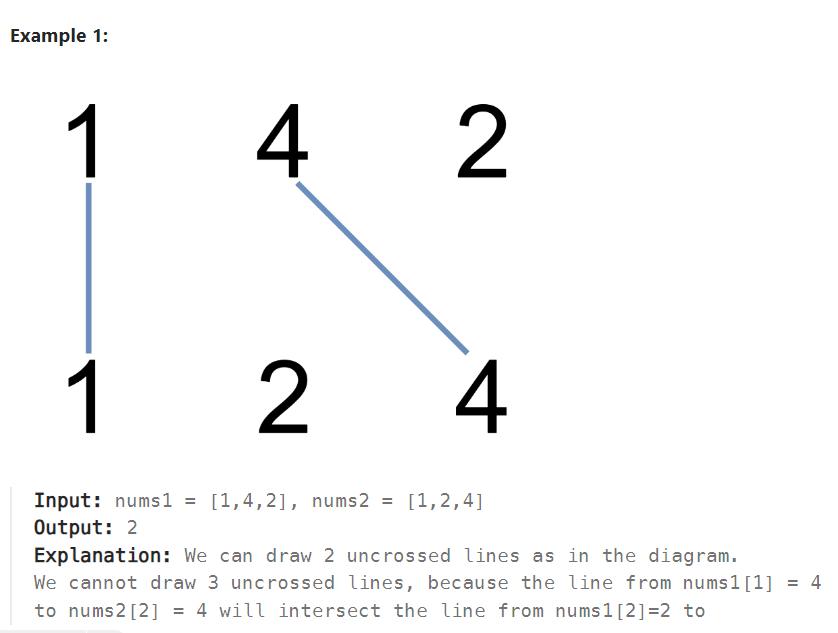

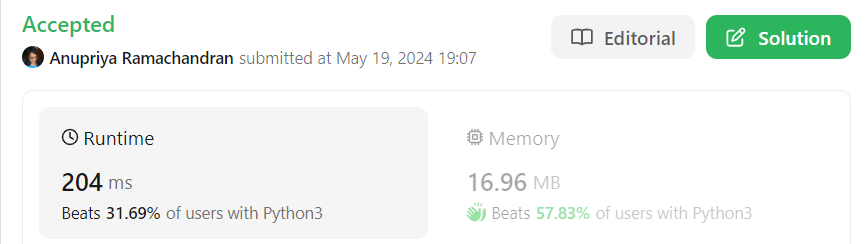

In [1]:
from typing import List

class Solution:
    def maxUncrossedLines(self, nums1: List[int], nums2: List[int]) -> int:
        dp = [[-1 for _ in range(len(nums2))] for _ in range(len(nums1))]
        return self.helper(dp, nums1, nums2, 0, 0)

    def helper(self, dp, nums1, nums2, i, j):
        if i == len(nums1) or j == len(nums2):
            return 0
            
        if dp[i][j] == -1:
            c1 = 0
            if nums1[i] == nums2[j]:
                dp[i][j] = 1 + self.helper(dp, nums1, nums2, i + 1, j + 1)
                
            else:
                c1 = self.helper(dp, nums1, nums2, i + 1, j)
                c2 = self.helper(dp, nums1, nums2, i, j + 1)
                dp[i][j] = max(c1, c2)
        return dp[i][j]

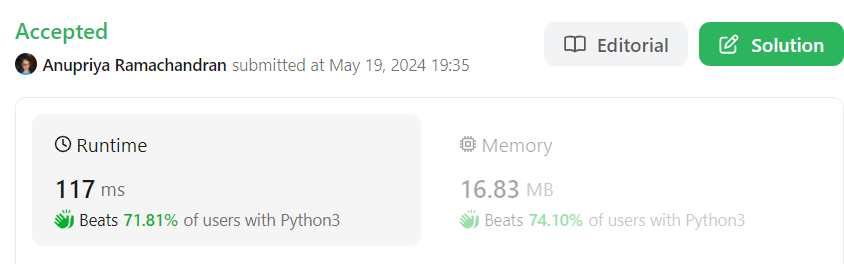

In [2]:
class Solution:
    def maxUncrossedLines(self, nums1: List[int], nums2: List[int]) -> int:
        dp = [[0 for _ in range(len(nums2)+ 1)] for _ in range(len(nums1) + 1)]
        n1 = len(nums1)
        n2 = len(nums2)

        for i in range(n1-1, -1, -1):
            for j in range(n2-1, -1, -1):
                if nums1[i] == nums2[j]:
                    dp[i][j] = 1 + dp[i+1][j+1]
                else:
                    dp[i][j] = max(dp[i+1][j], dp[i][j+1])

        return dp[0][0]